<a href="https://colab.research.google.com/github/jordanmsouza/TechChallenge_Fase1_Grupo4/blob/develop/Tech_Challange_Fase1_Grupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Adicionando bibliotecas

In [1]:
import numpy as np #transformação dos dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

## Normalizando variaveis Caracteristicas

### Declarando normalizador

In [2]:
label_enconder = LabelEncoder()

### Defina as características médias e desvios padrão para cada variável

In [22]:
# qtde_registros = 15000
# idades_media = 45
# idades_std = 15
# imc_media = 30
# imc_std = 5
# filhos_media = 2
# filhos_std = 2
# encargos_media = 25000
# encargos_std = 10000

### Criando o Data Set

In [7]:
dados = pd.read_csv("insurance_PT_BR.csv")
dados.head()

,idade,genero,imc,filhos,fumante,regiao,encargos
0,19,mulher,27.900,0,sim,sudoeste,16884.92400
1,18,homem,33.770,1,nao,sudeste,1725.55230
2,28,homem,33.000,3,nao,sudeste,4449.46200
3,33,homem,22.705,0,nao,noroeste,21984.47061
4,32,homem,28.880,0,nao,noroeste,3866.85520


### Gerando amostras sintéticas

In [4]:
# np.random.seed(100)  # Para garantir a reprodutibilidade
# idades = np.random.normal(loc=idades_media, scale=idades_std, size=qtde_registros)
# imcs = np.random.normal(loc=imc_media, scale=imc_std, size=qtde_registros)
# filhos = np.random.normal(loc=filhos_media, scale=filhos_std, size=qtde_registros)
# encargos = np.random.normal(loc=encargos_media, scale=encargos_std, size=qtde_registros)

# generos = np.random.choice(['feminino', 'masculino'], size=qtde_registros)
# fumantes = np.random.choice(['sim', 'não'], size=qtde_registros)
# regioes = np.random.choice(['sudoeste', 'nordeste','sul','norte','centro-oeste'], size=qtde_registros)

# dados = pd.DataFrame({
#     'idade': idades.round().astype(int),
#     'genero': generos,
#     'imc': imcs.round(2),
#     'filhos': filhos.round().astype(int),
#     'fumante': fumantes,
#     'regiao': regioes,
#     'encargos': encargos.round(2)
#     })

### Análise Descritiva dos Dados Originais

In [8]:
print("Estatísticas Descritivas dos Dados Originais:")
print(dados.describe())

Estatísticas Descritivas dos Dados Originais:
             idade          imc       filhos      encargos
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Gráficos de Distribuição

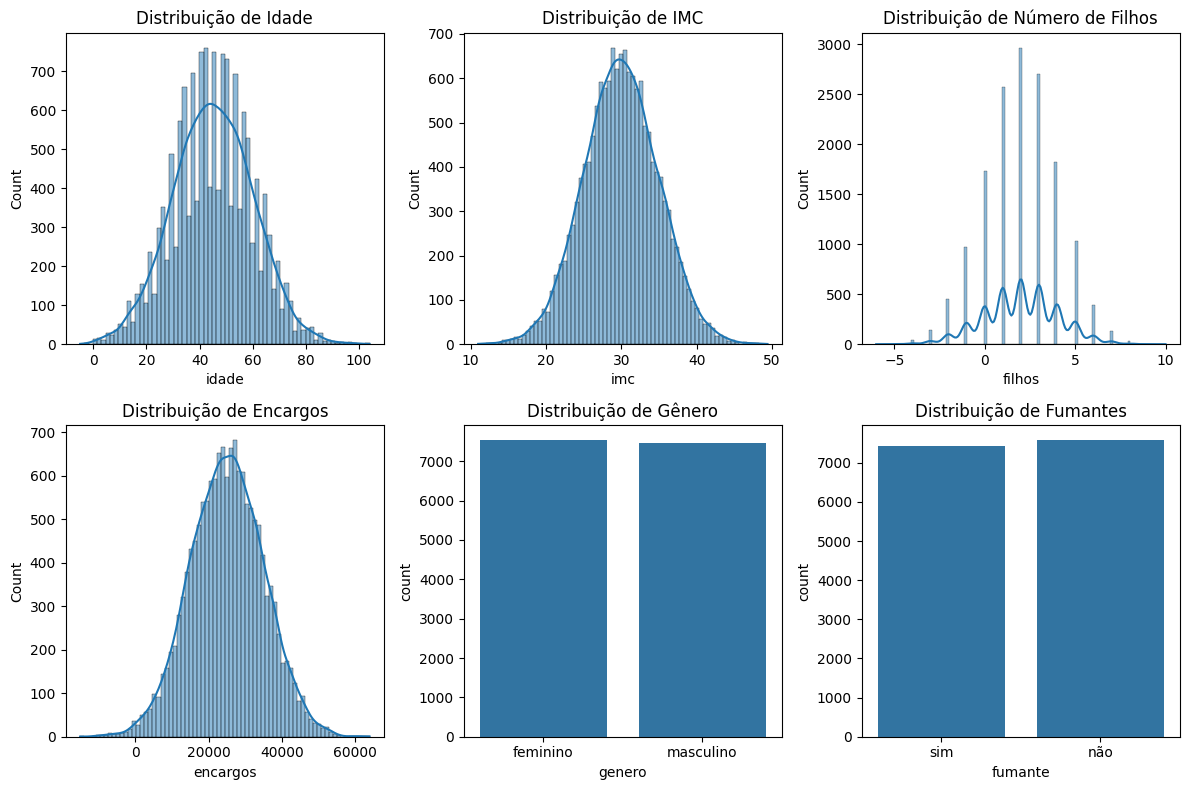

In [6]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(dados['idade'], kde=True)
plt.title('Distribuição de Idade')

plt.subplot(2, 3, 2)
sns.histplot(dados['imc'], kde=True)
plt.title('Distribuição de IMC')

plt.subplot(2, 3, 3)
sns.histplot(dados['filhos'], kde=True)
plt.title('Distribuição de Número de Filhos')

plt.subplot(2, 3, 4)
sns.histplot(dados['encargos'], kde=True)
plt.title('Distribuição de Encargos')

plt.subplot(2, 3, 5)
sns.countplot(x='genero', data=dados)
plt.title('Distribuição de Gênero')

plt.subplot(2, 3, 6)
sns.countplot(x='fumante', data=dados)
plt.title('Distribuição de Fumantes')

plt.subplot(2, 3, 6)
sns.countplot(x='regiao', data=dados)
plt.title('Distribuição de regiões')

plt.tight_layout()
plt.show()

### Normalização Min-Max

In [7]:
scaler_minmax = MinMaxScaler()
dados_minmax = scaler_minmax.fit_transform(dados[['imc', 'encargos','idade','filhos']])
dados[['imc', 'encargos','idade','filhos']] = dados_minmax

### Padronizando dados

In [8]:
scaler_std = StandardScaler()
dados_std = scaler_std.fit_transform(dados[['imc', 'encargos','idade','filhos']])
dados[['imc', 'encargos','idade','filhos']] = dados_std

dados["fumante"] = label_enconder.fit_transform(dados["fumante"])
dados["genero"] = label_enconder.fit_transform(dados["genero"])

df = pd.get_dummies(dados["regiao"], prefix = "dummy")
dados_coeded = pd.concat([dados, df], axis=1)
dados_coeded.drop(["regiao"], axis=1, inplace = True)

### Análise Comparativa Pré e Pós-Tratamento

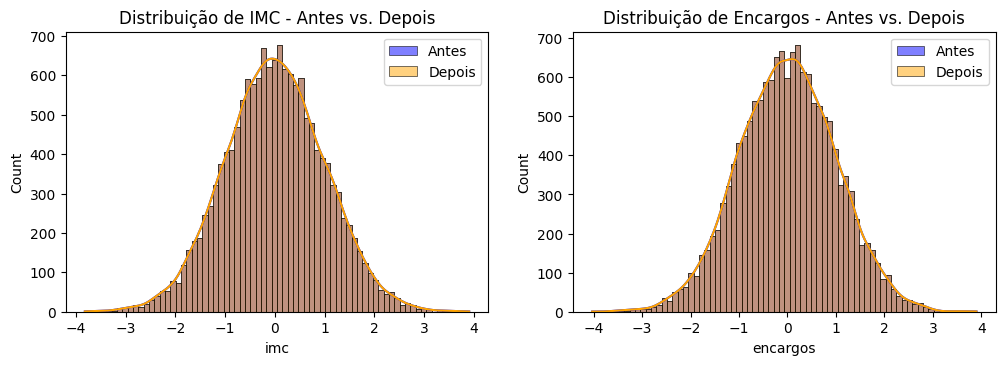

In [9]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(dados['imc'], kde=True, color='blue', label='Antes')
sns.histplot(dados_std[:, 0], kde=True, color='orange', label='Depois')
plt.title('Distribuição de IMC - Antes vs. Depois')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(dados['encargos'], kde=True, color='blue', label='Antes')
sns.histplot(dados_std[:, 1], kde=True, color='orange', label='Depois')
plt.title('Distribuição de Encargos - Antes vs. Depois')
plt.legend()

### Definindo a target.

In [10]:
x = dados_coeded.drop(columns=['encargos'])
y = dados_coeded["encargos"]

## Inicio Da Validação Cruzada

In [11]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

### Aplicar validação cruzada k-fold

In [12]:
scores = cross_val_score(forest_model, x, y, cv=5, scoring='neg_mean_squared_error')

### Calcular a média dos scores de erro médio quadrático (MSE)

In [13]:
mean_mse = -scores.mean()
print("Média do Erro Médio Quadrático (MSE) utilizando Cross-Validation:", mean_mse)

Média do Erro Médio Quadrático (MSE) utilizando Cross-Validation: 1.0938317347934077


## Fim Da Validação Cruzada

### Divisão entre treino e teste

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Inicio Do Modelo De Random Forest

### Estanciando Modelo

In [15]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

### Treinando modelo

In [16]:
forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

### Fazendo previsões nos dados de teste

In [17]:
y_pred_forest = forest_model.predict(x_test)

### Avaliar o desempenho do modelo

In [18]:
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Erro médio quadrático (MSE) - Floresta Aleatória:", mse_forest)
print("Coeficiente de determinação (R^2) - Floresta Aleatória:", r2_forest)

Erro médio quadrático (MSE) - Floresta Aleatória: 1.0866825523385402
Coeficiente de determinação (R^2) - Floresta Aleatória: -0.08890041615788724


### Análise do Desempenho do Modelo

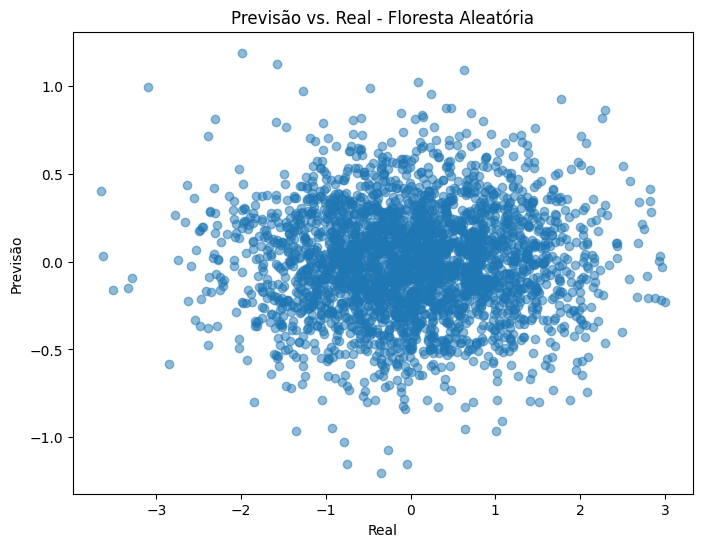

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_forest, alpha=0.5)
plt.xlabel('Real')
plt.ylabel('Previsão')
plt.title('Previsão vs. Real - Floresta Aleatória')
plt.show()

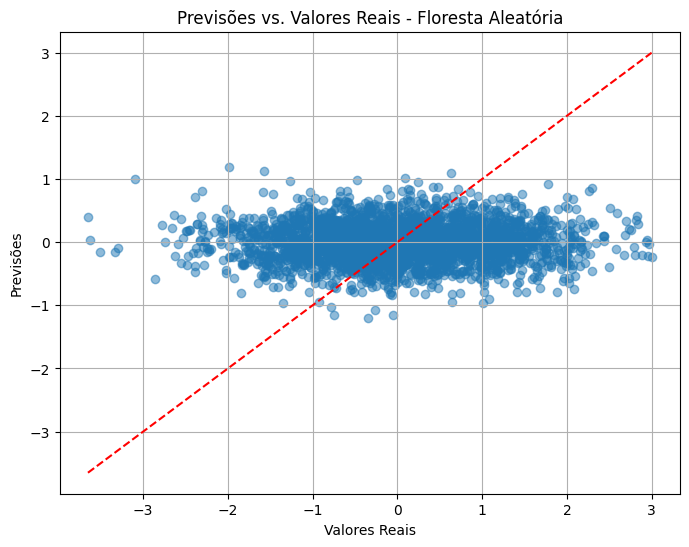

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_forest, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha diagonal para referência
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais - Floresta Aleatória')
plt.grid(True)
plt.show()

## Fim Do Modelo De Random Forest